In [39]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [40]:
data = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
rows, columns = X_train.shape

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(columns)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Test Score: {}".format(model.evaluate(X_test, y_test)))
print("Train Score: {}".format(model.evaluate(X_train, y_train)))

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1.0055 - accuracy: 0.2889 - val_loss: 0.9167 - val_accuracy: 0.3138
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9086 - accuracy: 0.3487 - val_loss: 0.8324 - val_accuracy: 0.3830
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7923 - accuracy: 0.4471 - val_loss: 0.7587 - val_accuracy: 0.4840
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.5310 - val_loss: 0.6931 - val_accuracy: 0.5426
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.6246 - val_loss: 0.6364 - val_accuracy: 0.6117
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.6970 - val_loss: 0.5878 - val_accuracy: 0.6862
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 0.5993 - accuracy: 0.7005 - val_loss: 0.5454 - val_accuracy: 0.7394
Epoch 8/100

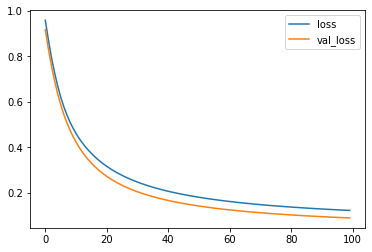

In [43]:
import matplotlib.pyplot as plt
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend();

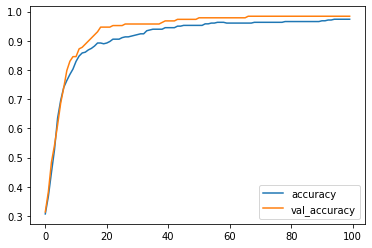

In [44]:
plt.plot(res.history['accuracy'], label='accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [45]:
p = model.predict(X_test)
p = np.round(p).flatten()

print("Manually calculated accuracy: {}".format(np.mean(p == y_test)))
print("Evaluate output: {}".format(model.evaluate(X_test, y_test)))

Manually calculated accuracy: 0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9840
Evaluate output: [0.0895550474524498, 0.9840425252914429]


In [46]:
model.save('linear.h5')
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jan 20 07:35 linear.h5
drwxr-xr-x 1 root root 4.0K Jan 15 17:28 sample_data


In [47]:
loma = tf.keras.models.load_model('linear.h5')
loma.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9840


[0.0895550474524498, 0.9840425252914429]